#  Importing modules

In [1]:
import pandas as pd
import numpy as np
from plotnine import *
from scipy.interpolate import interp1d

# Creating example data

In [2]:
data =  pd.DataFrame(data = {'Flux': [0, 0.5, 1, 2, 4, 8, 15, 33],
                             'TGFb': [2.2, 2, 1.8, 1.6, 1.5, 1.25, 1.1, 1]})
data

,Flux,TGFb
0,0.0,2.20
1,0.5,2.00
2,1.0,1.80
3,2.0,1.60
4,4.0,1.50
5,8.0,1.25
6,15.0,1.10
7,33.0,1.00


# Example Interpolation
Below is an example of an interpolation function. It linearly interpolates a value from a given series of x and y values. Below it calculates the TGFb value using a given flux. Since the `geom_line` function connects the points linearly, interp1d should perfectly match the line on the plot. However, the relationship for x and y must be monotonic.

In [3]:
fxy = interp1d(data.Flux, data.TGFb)
# Predicting TGFb by giving a Flux value
coord2 = [10, float(fxy(10))]
coord2

[10, 1.207142857142857]

# Plotting
The plot below has 3 annotation examples. The first one is a horizontal line with text. The second adds a horizontal and vertical line to a specific x and y coordinate on the plot and annotates it with text. The third example does the same, but uses the coordinates we defined using the interpolation function. A ymin and xmax were also defined to ensure the lines connect to the edges of the plot.

To create a line you define the starting and ending x and y positions. You can also define additional arguments such as color, size and whether to add an arrow.

To create text, you can use either the `'text'` function or `'label'` function. The `'label'` function adds a box around the text. The text is defined manually since the position will depend heavily on what is on the plot and the size and length of the text and will need to be adjusted when the code is used in other plots. The text can be formatted using standard python text formatting, or the `parse` argument can be set to `True`, which allows for LaTex formatting.

One limitation of plotnine is that annotations can only occur in the plotting area, annotations that go outside of the plotting area will be cut off.

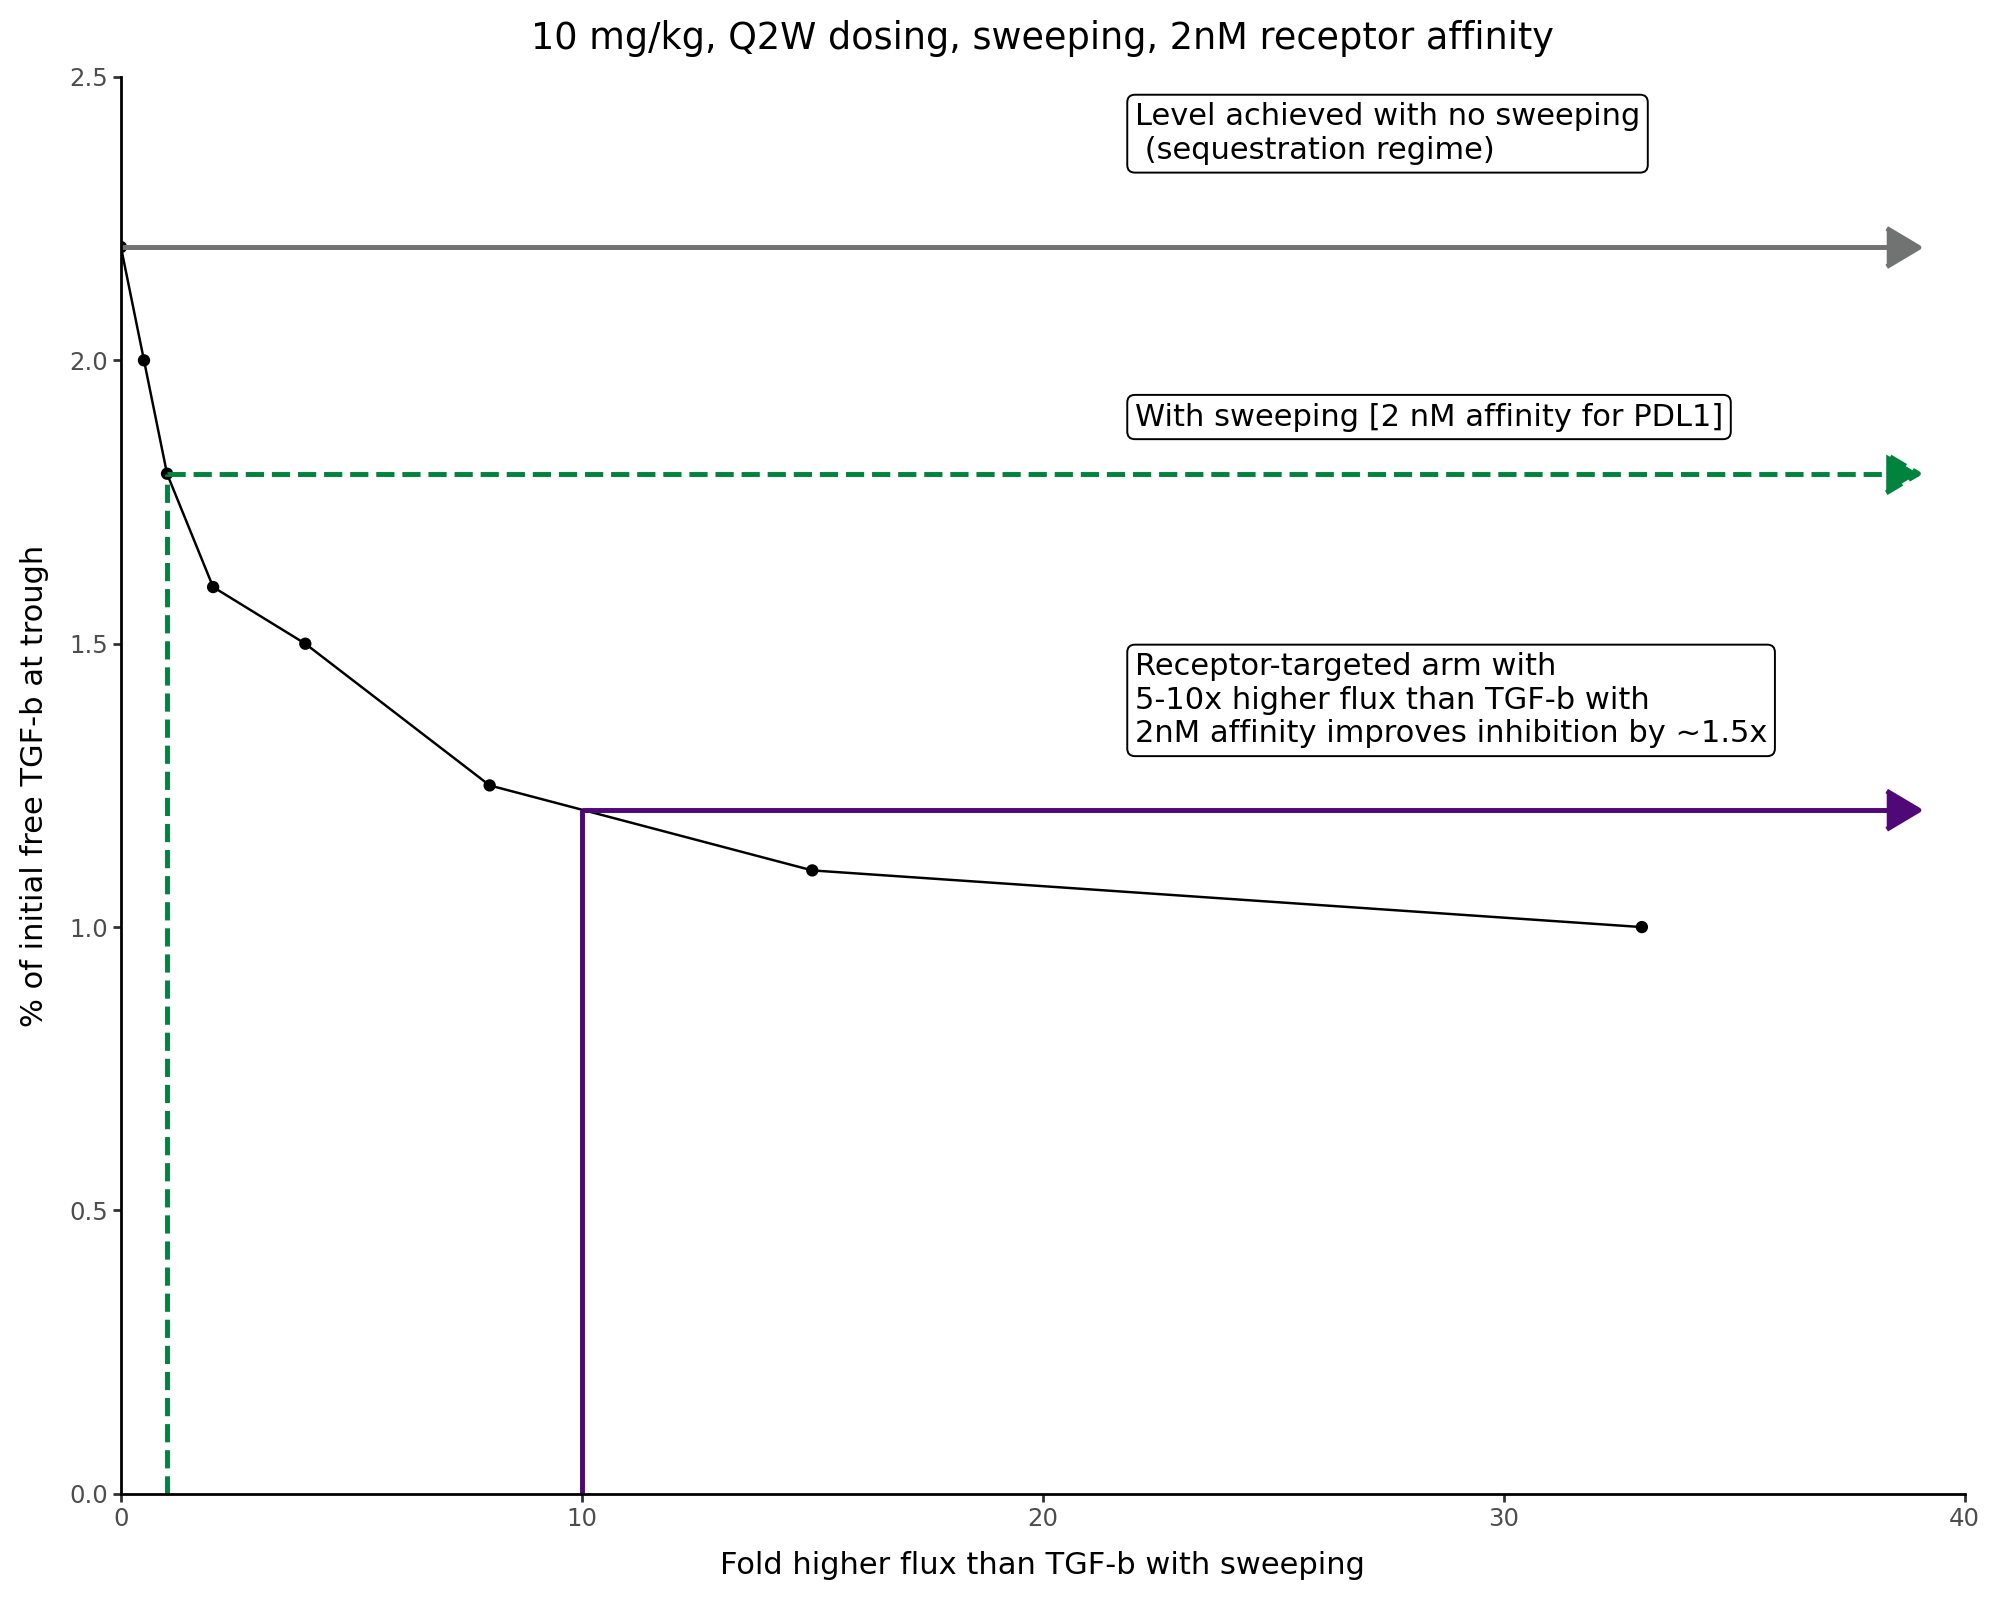

In [4]:
# Defining coordinates for green line
coord1 = [1, 1.8]

# Defining the edges of the plot for lines
xmax = 40
ymin = 0

(ggplot() +
    # Adding the line and points of the data
    geom_line(data = data, 
              mapping = aes(x = 'Flux', y = 'TGFb')) + 
    geom_point(data = data, 
              mapping = aes(x = 'Flux', y = 'TGFb')) + 
 
     # A horizontal line denoting the max of the TGFb
     annotate(geom = 'segment',
             x = ymin,
             xend = xmax - 1,
             y = 2.2,
             yend = 2.2,
             arrow = arrow(type = 'closed', length = 0.1), #adds an arrow to the end
             size = 1, 
             color = '#707372') +
    # Text 
    annotate(geom = 'label',
             x = 22,
             y = 2.4,
             ha = 'left', # Changes the text to be left aligned
             label = 'Level achieved with no sweeping\n (sequestration regime)') +
    
    # 2 lines, one vertical and horizontal that connect at the coordinates specified in coord1
    # Vertical line that goes up to the y value specified.
    annotate(geom = 'segment',
             x = coord1[0],
             xend = coord1[0],
             y = ymin,
             yend = coord1[1],
             size = 1,
             linetype = '--',
             color = '#00843D') +
    # Horizontal line that goes from the x value specified to the end of the plot
    annotate(geom = 'segment',
             x = coord1[0],
             xend = xmax - 1,
             y = coord1[1],
             yend = coord1[1],
             arrow = arrow(type = 'closed', length = 0.1),
             size = 1,
             linetype = '--',
             color = '#00843D') +
    # Text for the associated line
    annotate(geom = 'label',
             x = 22,
             y = 1.9,
             ha = 'left',
             label = 'With sweeping [2 nM affinity for PDL1]') + 
 
    # 2 lines, one vertical and horizontal that connect at the coordinates specified by interpolation
    # Vertical line that goes up to the y value that was calculated
    annotate(geom = 'segment',
             x = coord2[0],
             xend = coord2[0],
             y = ymin,
             yend = coord2[1],
             size = 1,
             color = '#500778') +
    # Horizontal line that goes from the x value specified to the end of the plot
    annotate(geom = 'segment',
             x = coord2[0],
             xend = xmax - 1,
             y = coord2[1],
             yend = coord2[1],
             arrow = arrow(type = 'closed', length = 0.1),
             size = 1, 
             color = '#500778') +
    # Text
    annotate(geom = 'label',
             x = 22,
             y = 1.4,
             ha = 'left',
             label = 'Receptor-targeted arm with \n5-10x higher flux than TGF-b with \n2nM affinity improves inhibition by ~1.5x') +
    # Setting the limits of the plot
    coord_cartesian(xlim=[0,xmax], ylim=[ymin,2.5]) + 
    # Setting the expand to 0 so the bottom left corner of the plot is (0,0)
    scale_x_continuous(expand = [0, 0]) + 
    scale_y_continuous(expand = [0, 0]) +
    # Labels for the plot
    labs(x = 'Fold higher flux than TGF-b with sweeping', 
         y = '% of initial free TGF-b at trough', 
         title = '10 mg/kg, Q2W dosing, sweeping, 2nM receptor affinity') + 
    # Setting theme and figure size
    theme_classic() + 
    theme(figure_size = [10,8])
 
)